# Objective 

The primary objective of this project is to investigate the factors that contribute to student dropout in higher education institutions. By analyzing demographic characteristics, parental background, enrollment details, and academic performance, the study aims to identify key patterns and risk factors linked to higher dropout rates. In addition to exploratory, the project will develop a predictive classification model to distinguish students at risk of dropping out from those likely to continue or graduate. This classifier will enable early identification of vulnerable students and support timely interventions. Ultimately, the insights and predictive tool will help institutions implement targeted retention strategies and improve overall student success rates.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('data.csv',delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.shape

(4424, 37)

In [6]:
clean_columns = [
    'marital_status',
    'application_mode',
    'application_order',
    'course',
    'daytime_evening_attendance',
    'previous_qualification',
    'previous_qualification_grade',
    'nationality',
    'mothers_qualification',
    'fathers_qualification',
    'mothers_occupation',
    'fathers_occupation',
    'admission_grade',
    'displaced',
    'educational_special_needs',
    'debtor',
    'tuition_fees_up_to_date',
    'gender',
    'scholarship_holder',
    'age_at_enrollment',
    'international',
    'curricular_units_1st_sem_credited',
    'curricular_units_1st_sem_enrolled',
    'curricular_units_1st_sem_evaluations',
    'curricular_units_1st_sem_approved',
    'curricular_units_1st_sem_grade',
    'curricular_units_1st_sem_without_evaluations',
    'curricular_units_2nd_sem_credited',
    'curricular_units_2nd_sem_enrolled',
    'curricular_units_2nd_sem_evaluations',
    'curricular_units_2nd_sem_approved',
    'curricular_units_2nd_sem_grade',
    'curricular_units_2nd_sem_without_evaluations',
    'unemployment_rate',
    'inflation_rate',
    'gdp',
    'target']

data.columns = clean_columns

In [7]:
data.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nationality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


* **marital_status :**  1 – single, 2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6 – legally separated
* **application_mode :** 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
* **application_order :** Application order (between 0 - first choice; and 9 last choice)
* **course :** 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)
* **daytime_evening_attendance :**	1 – daytime 0 - evening
* **previous_qualification :** Education Level	1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)
* **previous_qualification_grade :** Grade of previous qualification (between 0 and 200)
* **nationality :**	1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian
* **mothers_qualification :** 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
* **fathers_qualification :** 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)
* **mothers_occupation :**	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
* **fathers_occupation :**	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers
* **admission_grade :**	Admission grade (between 0 and 200)
* **displaced :** 1 – yes 0 – no
* **educational_special_needs :** 1 – yes 0 – no
* **debtor :** 1 – yes 0 – no
* **tuition_fees_up_to_date :**	1 – yes 0 – no
* **gender :** 1 – male 0 – female
* **scholarship_holder :**	1 – yes 0 – no
* **age_at_enrollment :**	Age of studend at enrollment
* **international :**		1 – yes 0 – no		
* **curricular_units_1st_sem_credited :**		Number of curricular units credited in the 1st semester		
* **curricular_units_1st_sem_enrolled :**		Number of curricular units enrolled in the 1st semester		
* **curricular_units_1st_sem_evaluations :**			Number of evaluations to curricular units in the 1st semester		
* **curricular_units_1st_sem_approved :**		Number of curricular units approved in the 1st semester		
* **curricular_units_1st_sem_grade :**		Grade average in the 1st semester (between 0 and 20)		
* **curricular_units_1st_sem_without_evaluations :**		Number of curricular units without evalutions in the 1st semester		
* **curricular_units_2nd_sem_credited :** 	Number of curricular units credited in the 2nd semester		
* **curricular_units_2nd_sem_enrolled :**		Number of curricular units enrolled in the 2nd semester		
* **curricular_units_2nd_sem_evaluations :**		Number of evaluations to curricular units in the 2nd semester
* **curricular_units_2nd_sem_approved :** 		Number of curricular units approved in the 2nd semester		
* **curricular_units_2nd_sem_grade :**		Grade average in the 2nd semester (between 0 and 20)		
* **curricular_units_2nd_sem_without_evaluations :**		Number of curricular units without evalutions in the 1st semester		
* **unemployment_rate :**			Unemployment rate (%)		
* **inflation_rate :**			Inflation rate (%)		
* **gdp	 :**		GDP		
* **target :**	The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course				

In [8]:
data.isna().any()

marital_status                                  False
application_mode                                False
application_order                               False
course                                          False
daytime_evening_attendance                      False
previous_qualification                          False
previous_qualification_grade                    False
nationality                                     False
mothers_qualification                           False
fathers_qualification                           False
mothers_occupation                              False
fathers_occupation                              False
admission_grade                                 False
displaced                                       False
educational_special_needs                       False
debtor                                          False
tuition_fees_up_to_date                         False
gender                                          False
scholarship_holder          

In [9]:
data.dtypes

marital_status                                    int64
application_mode                                  int64
application_order                                 int64
course                                            int64
daytime_evening_attendance                        int64
previous_qualification                            int64
previous_qualification_grade                    float64
nationality                                       int64
mothers_qualification                             int64
fathers_qualification                             int64
mothers_occupation                                int64
fathers_occupation                                int64
admission_grade                                 float64
displaced                                         int64
educational_special_needs                         int64
debtor                                            int64
tuition_fees_up_to_date                           int64
gender                                          

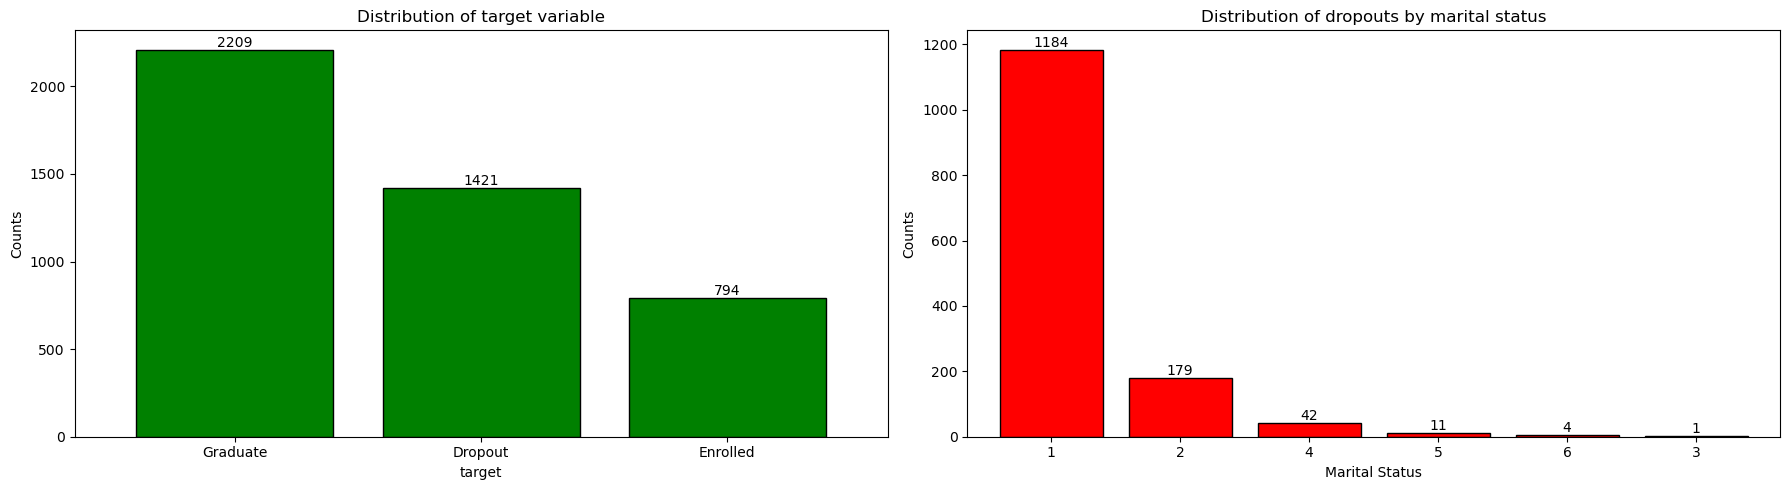

In [10]:
target_counts = data.target.value_counts().sort_values(ascending=False)
dropout_marital = data[data['target']=='Dropout'].groupby('marital_status').size().sort_values(ascending=False)

# Subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Distribution of target variable
ax1 = axes[0]
target_counts.plot(kind='bar',
                   color='green',
                   edgecolor='black',
                   width=0.8,
                   ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_xticklabels(target_counts.index, rotation=0)
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of target variable')

# Plot 2: Distribution of dropouts by marital status
ax2 = axes[1]
dropout_marital.plot(kind='bar',
                     color='red',
                     edgecolor='black',
                     width=0.8,
                     ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xticklabels(dropout_marital.index, rotation=0)
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Counts')
ax2.set_title('Distribution of dropouts by marital status')

plt.tight_layout()
plt.show()

Observations: <br>
* Dropouts form a large portion of the student population, which suggests retention is a major issue.
* Single students [Martial Status = 1] are much more likely to drop out than students with other marital statuses — this could be due to lower family support or higher mobility.
* Understanding why single students drop out at higher rates can help design targeted support programs to improve retention.

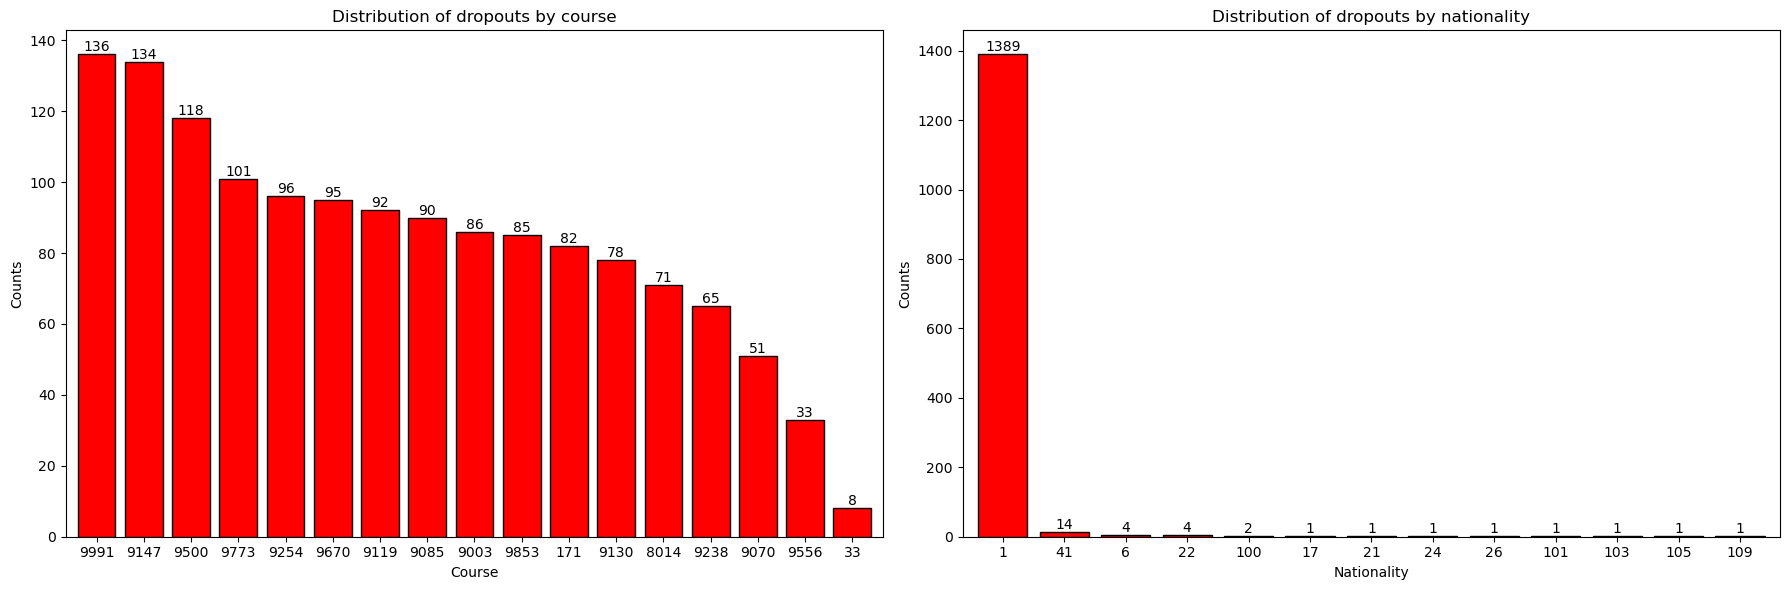

In [11]:
dropout_course = data[data['target'] == 'Dropout'].groupby('course').size().sort_values(ascending=False)
dropout_nationality = data[data['target'] == 'Dropout'].groupby('nationality').size().sort_values(ascending=False)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ---- Plot 1: Dropouts by Course ----
ax1 = axes[0]
dropout_course.plot(
    kind='bar',
    ax=ax1,
    color='red',
    edgecolor='black',
    width=0.8
)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_xticklabels(dropout_course.index, rotation=0)
ax1.set_xlabel('Course')
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of dropouts by course')

# ---- Plot 2: Dropouts by Nationality ----
ax2 = axes[1]
dropout_nationality.plot(
    kind='bar',
    ax=ax2,
    color='red',
    edgecolor='black',
    width=0.8
)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xticklabels(dropout_nationality.index, rotation=0)
ax2.set_xlabel('Nationality')
ax2.set_ylabel('Counts')
ax2.set_title('Distribution of dropouts by nationality')

plt.tight_layout()
plt.show()

Observations: <br>
* Dropouts are heavily concentrated in a few key courses, particularly Management (evening attendance), Management, Nursing, and Journalism and Communication, each showing notably higher dropout counts than other programs.
* Courses related to business, communication, and health tend to have the highest dropout rates, while specialized programs like Biofuel Production Technologies and Oral Hygiene have the lowest.
* Portuguese students account for the vast majority of dropouts, making student retention primarily a domestic issue.
* Dropouts among international students are minimal, with only a handful of cases across nationalities such as Brazilian, Spanish, Cape Verdean, and a few others.

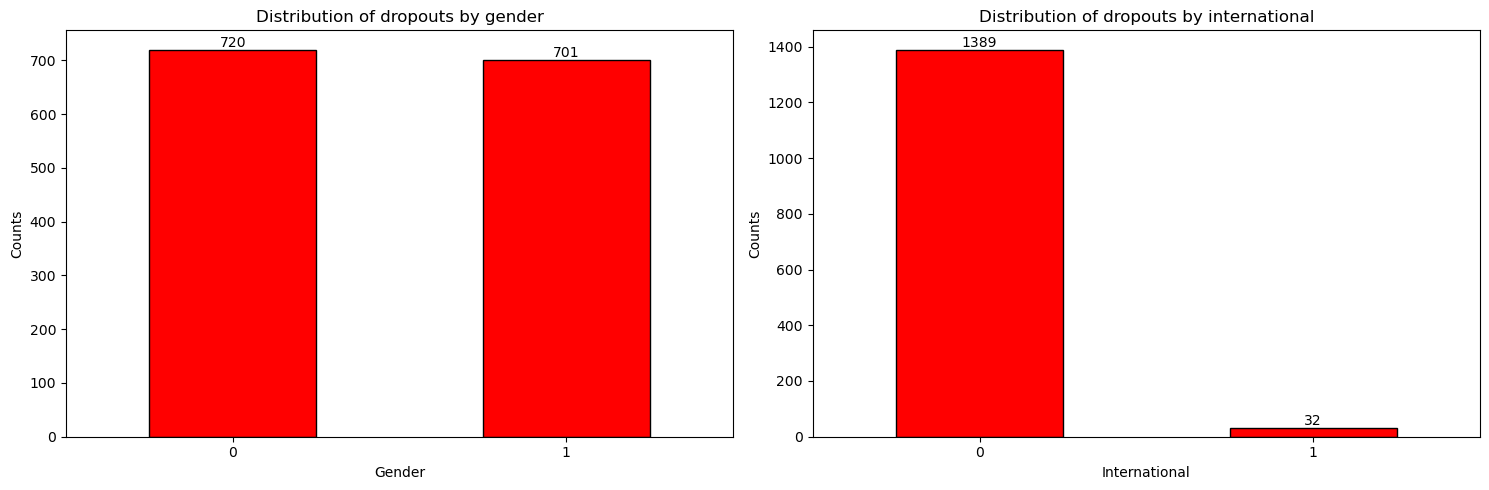

In [12]:
grouped_gender = data[data['target']=='Dropout'].groupby('gender').size().sort_values(ascending=False)
grouped_international = data[data['target']=='Dropout'].groupby('international').size().sort_values(ascending=False)

# Subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ---- Plot 1: Gender ----
ax1 = axes[0]
grouped_gender.plot(
    kind='bar',
    ax=ax1,
    stacked=False,
    edgecolor='black',
    width=0.5,
    color='red'
)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of dropouts by gender')
ax1.set_xticklabels(grouped_gender.index, rotation=0)

# ---- Plot 2: International ----
ax2 = axes[1]
grouped_international.plot(
    kind='bar',
    ax=ax2,
    stacked=False,
    edgecolor='black',
    width=0.5,
    color='red'
)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlabel('International')
ax2.set_ylabel('Counts')
ax2.set_title('Distribution of dropouts by international')
ax2.set_xticklabels(grouped_international.index, rotation=0)

plt.tight_layout()
plt.show()

Observations: <br>
Gender does not appear to be a strong factor in dropout risk, but being a domestic student is clearly associated with a much higher dropout rate compared to international students.

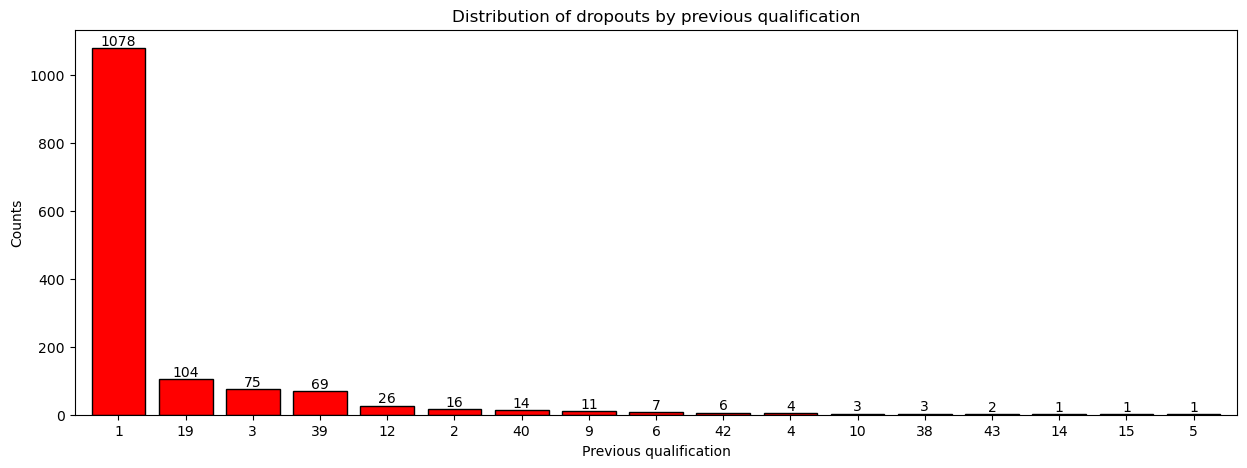

In [92]:
grouped = data[data['target']=='Dropout'].groupby('previous_qualification').size().sort_values(ascending=False)
ax = grouped.plot(kind='bar', 
                      figsize=(15, 5), 
                      stacked=False,
                      edgecolor='black',
                      width=0.8,
                      color='red')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.xlabel('Previous qualification')
plt.ylabel('Counts')
plt.title('Distribution of dropouts by previous qualification')
plt.show()

Observations: <br>
This suggests that students transitioning directly from secondary education [Previous qualification = 1] or basic cycles are at higher risk of dropping out, highlighting the need for stronger support mechanisms and bridging programs for first-year university students who lack prior higher education experience.

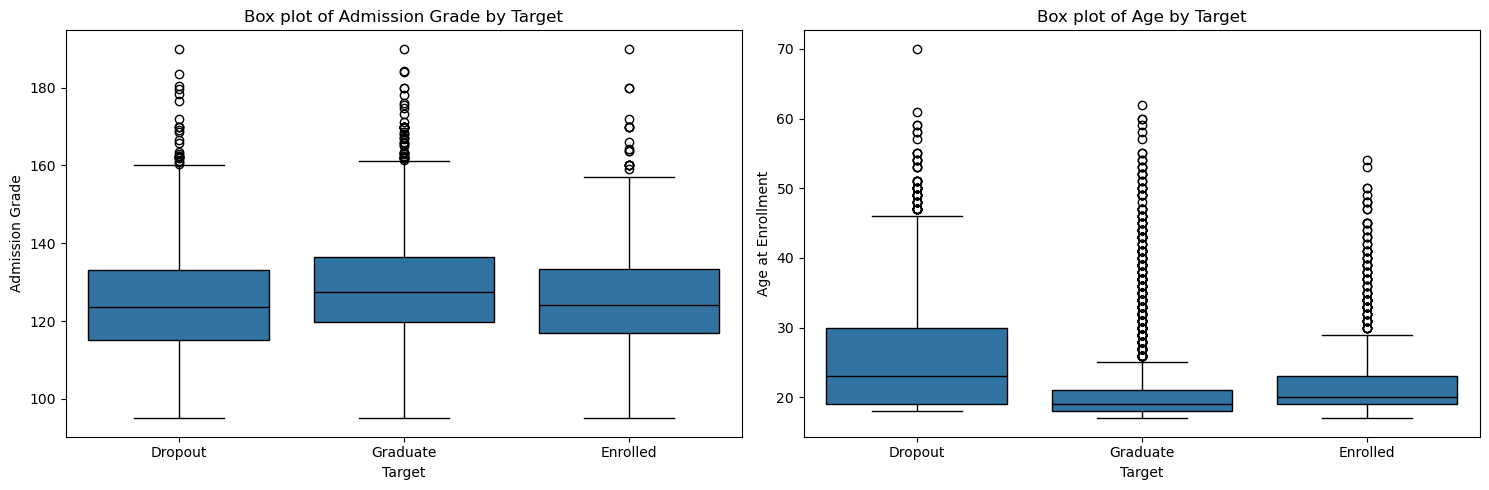

In [13]:
# Subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot 1: Admission Grade by Target
sns.boxplot(
    x='target',
    y='admission_grade',
    data=data,
    ax=axes[0],
    linecolor='black'
)
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Admission Grade')
axes[0].set_title('Box plot of Admission Grade by Target')

# Box plot 2: Age at Enrollment by Target
sns.boxplot(
    x='target',
    y='age_at_enrollment',
    data=data,
    ax=axes[1],
    linecolor='black'
)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Age at Enrollment')
axes[1].set_title('Box plot of Age by Target')

plt.tight_layout()
plt.show()

Observations:<br>
* Higher admission grades are positively associated with graduation, indicating that students with stronger academic preparation tend to succeed in completing their courses.
* Older age at enrollment is linked to a higher dropout risk, highlighting the need for flexible support systems for mature students who may balance studies with work or family responsibilities.

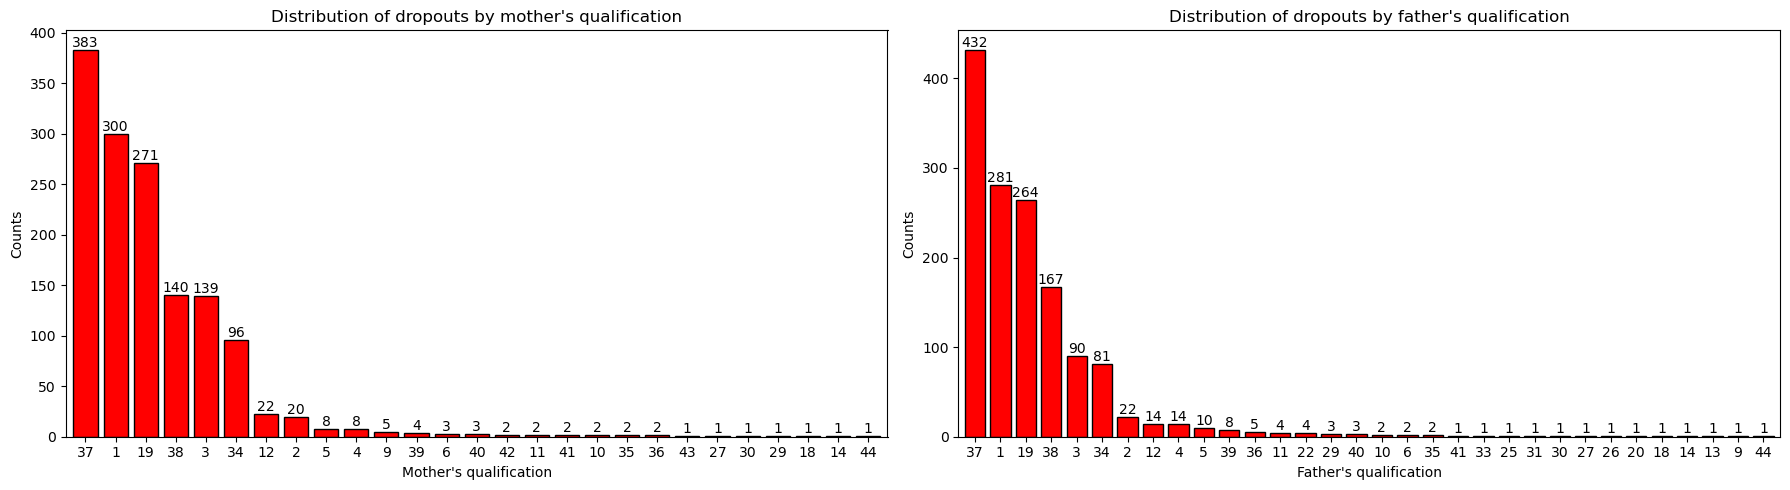

In [14]:
dropout_mother = data[data['target']=='Dropout'].groupby('mothers_qualification').size().sort_values(ascending=False)
dropout_father = data[data['target']=='Dropout'].groupby('fathers_qualification').size().sort_values(ascending=False)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Mother's qualification
ax1 = axes[0]
dropout_mother.plot(kind='bar',
                    color='red',
                    edgecolor='black',
                    width=0.8,
                    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
    
ax1.set_xticklabels(dropout_mother.index, rotation=0)
ax1.set_xlabel('Mother\'s qualification')
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of dropouts by mother\'s qualification')

# Plot 2: Father's qualification
ax2 = axes[1]
dropout_father.plot(kind='bar',
                    color='red',
                    edgecolor='black',
                    width=0.8,
                    ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xticklabels(dropout_father.index, rotation=0)
ax2.set_xlabel('Father\'s qualification')
ax2.set_ylabel('Counts')
ax2.set_title('Distribution of dropouts by father\'s qualification')

plt.tight_layout()
plt.show()

Observation: <br>
* Students whose parents have lower levels of education — particularly those with only Basic Education 1st cycle (4th/5th year) are much more likely to drop out. This is evident as the highest dropout counts are from students whose mothers and fathers have these lower schooling levels.
* Students whose parents completed Secondary Education (12th year) also show a significant number of dropouts, although the risk declines compared to parents with only basic education.
* Dropout numbers drop sharply among students whose parents hold Higher Education degrees — such as Bachelor’s, Master’s, or Doctorate.
This suggests that higher parental education provides more support or advantages that help students persist to graduation.

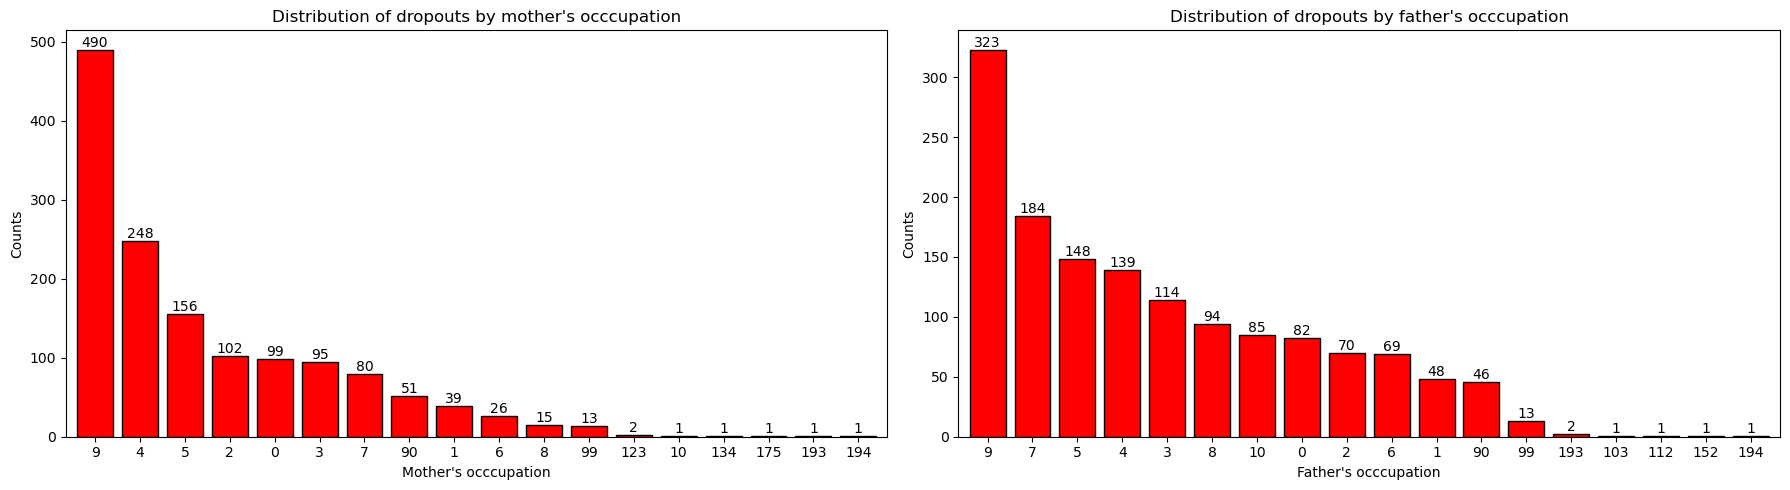

In [15]:
dropout_mother = data[data['target']=='Dropout'].groupby('mothers_occupation').size().sort_values(ascending=False)
dropout_father = data[data['target']=='Dropout'].groupby('fathers_occupation').size().sort_values(ascending=False)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Mother's occupation
ax1 = axes[0]
dropout_mother.plot(kind='bar',
                    color='red',
                    edgecolor='black',
                    width=0.8,
                    ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
    
ax1.set_xticklabels(dropout_mother.index, rotation=0)
ax1.set_xlabel('Mother\'s occcupation')
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of dropouts by mother\'s occcupation')

# Plot 2: Father's occupation
ax2 = axes[1]
dropout_father.plot(kind='bar',
                    color='red',
                    edgecolor='black',
                    width=0.8,
                    ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xticklabels(dropout_father.index, rotation=0)
ax2.set_xlabel('Father\'s occcupation')
ax2.set_ylabel('Counts')
ax2.set_title('Distribution of dropouts by father\'s occcupation')

plt.tight_layout()
plt.show()

Observation: <br>
* Students whose parents work in lower-skilled, manual, or unskilled occupations have a significantly higher likelihood of dropping out. This trend is consistent for both mothers’ and fathers’ occupations, with unskilled labor being the most common background among dropout cases.
* Higher parental occupational status such as professional, technical, or managerial roles appears to be associated with lower student dropout rates. This suggests that economic stability and social capital linked to parental occupation may play an important role in student persistence.

In [126]:
# Define features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [131]:
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded  = label_encoder.transform(y_test)

In [132]:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


In [133]:
# Check split sizes
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3539, 36)
Test size: (885, 36)


In [135]:
X_train.dtypes

marital_status                                    int64
application_mode                                  int64
application_order                                 int64
course                                            int64
daytime_evening_attendance                        int64
previous_qualification                            int64
previous_qualification_grade                    float64
nationality                                       int64
mothers_qualification                             int64
fathers_qualification                             int64
mothers_occupation                                int64
fathers_occupation                                int64
admission_grade                                 float64
displaced                                         int64
educational_special_needs                         int64
debtor                                            int64
tuition_fees_up_to_date                           int64
gender                                          

In [136]:
numerical_cols   = X_train.select_dtypes(include=['float64']).columns.tolist()

In [142]:
preprocessor = ColumnTransformer(transformers=[
                     ('num', StandardScaler(), numerical_cols)],# no transformer for categorical columns: they are ignored
                     remainder='passthrough', # keeps other columns unchanged
                     force_int_remainder_cols=False)                   

In [161]:
clf_pipeline_rf = Pipeline(steps=[
                      ('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Hyperparameter grid for RandomForest
param_distributions_rf = {
    'classifier__n_estimators': [20, 30, 40],
    'classifier__max_depth': [2, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]}

# RandomizedSearchCV setup
random_search_rf = RandomizedSearchCV(
                    clf_pipeline_rf,
                    param_distributions=param_distributions_rf,
                    n_iter=10,
                    cv=3,
                    verbose=3,
                    scoring='accuracy')

In [162]:
random_search_rf.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END classifier__max_depth=2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=20;, score=0.701 total time=   0.0s
[CV 2/3] END classifier__max_depth=2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=20;, score=0.716 total time=   0.0s
[CV 3/3] END classifier__max_depth=2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=20;, score=0.708 total time=   0.0s
[CV 1/3] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=40;, score=0.739 total time=   0.0s
[CV 2/3] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=40;, score=0.747 total time=   0.0s
[CV 3/3] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_es

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['previous_qualification_grade',
                                                                                'admission_grade',
                                                                                'curricular_units_1st_sem_grade',
                                                                                'curricular_units_2nd_sem_grade',
                                                                                'unemployment_rate',
                                                                                'inflation_rate',
                                                                                'gdp'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__max_depth': [2, 5, 7],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [20, 30,
                                                                     40]},
                   scoring='accuracy', verbose=3)

In [163]:
print(f"Train Accuracy: {random_search_rf.score(X_train, y_train_encoded):.4f}")
print(f"Test Accuracy: {random_search_rf.score(X_test, y_test_encoded):.4f}")

Train Accuracy: 0.8158
Test Accuracy: 0.7514


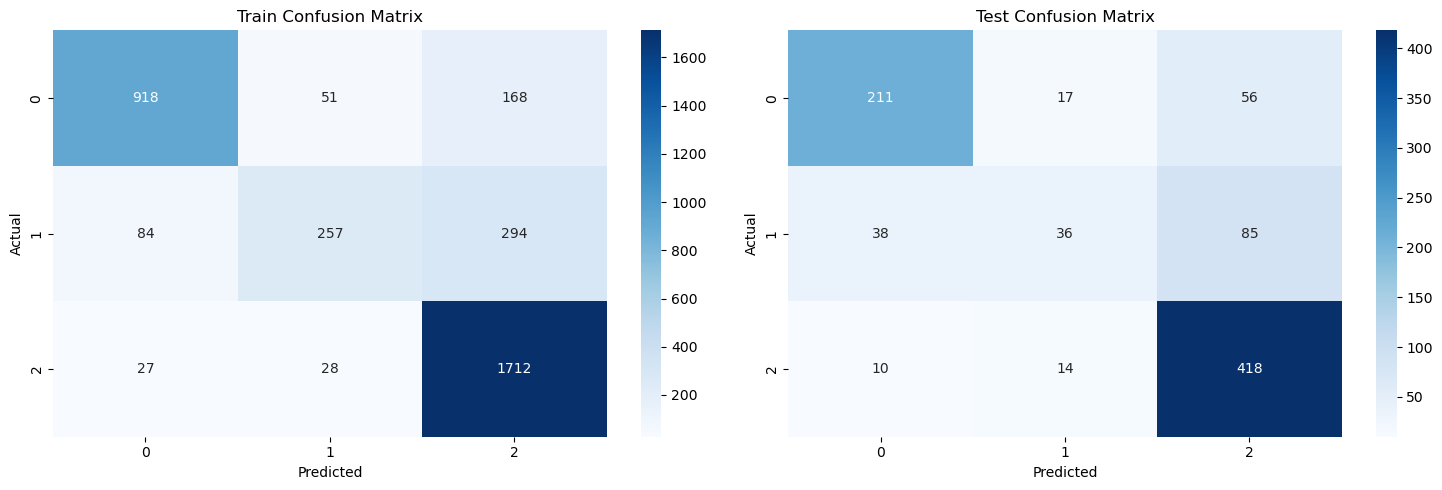

In [164]:
# Predict for train and test
y_train_pred_rf = random_search_rf.predict(X_train)
y_test_pred_rf  = random_search_rf.predict(X_test)

# Compute confusion matrices
cm_train_rf = confusion_matrix(y_train_encoded, y_train_pred_rf)
cm_test_rf  = confusion_matrix(y_test_encoded, y_test_pred_rf)  

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [165]:
clf_pipeline_xgb = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', XGBClassifier())])

# Hyperparameter grid for XGBoost
param_distributions_xgb = {
    'classifier__n_estimators': [10, 20, 30, 40],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]}

# RandomizedSearchCV setup
random_search_xgb = RandomizedSearchCV(
                     clf_pipeline_xgb,
                     param_distributions=param_distributions_xgb,
                     n_iter=10,
                     cv=3,
                     verbose=3,
                     scoring='accuracy')

In [166]:
random_search_xgb.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=30, classifier__subsample=0.7;, score=0.749 total time=   0.0s
[CV 2/3] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=30, classifier__subsample=0.7;, score=0.780 total time=   0.0s
[CV 3/3] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=30, classifier__subsample=0.7;, score=0.762 total time=   0.0s
[CV 1/3] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=30, classifier__subsample=0.8;, score=0.748 total time=   0.0s
[CV 2/3] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=30, classifier__subsample=0.8;, score=0.778 tot

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['previous_qualification_grade',
                                                                                'admission_grade',
                                                                                'curricular_units_1st_sem_grade',
                                                                                'curricular_units_2nd_sem_grade',
                                                                                'unemployment_rate',
                                                                                'inflation_rate',
                                                                                'gdp'])])),
                                             ('classif...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   param_distributions={'classifier__colsample_bytree': [0.7,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [10, 20, 30,
                                                                     40],
                                        'classifier__subsample': [0.7, 0.8,
                                                                  1.0]},
                   scoring='accuracy', verbose=3)

In [167]:
print(f"Train Accuracy: {random_search_xgb.score(X_train, y_train_encoded):.4f}")
print(f"Test Accuracy: {random_search_xgb.score(X_test, y_test_encoded):.4f}")

Train Accuracy: 0.8350
Test Accuracy: 0.7695


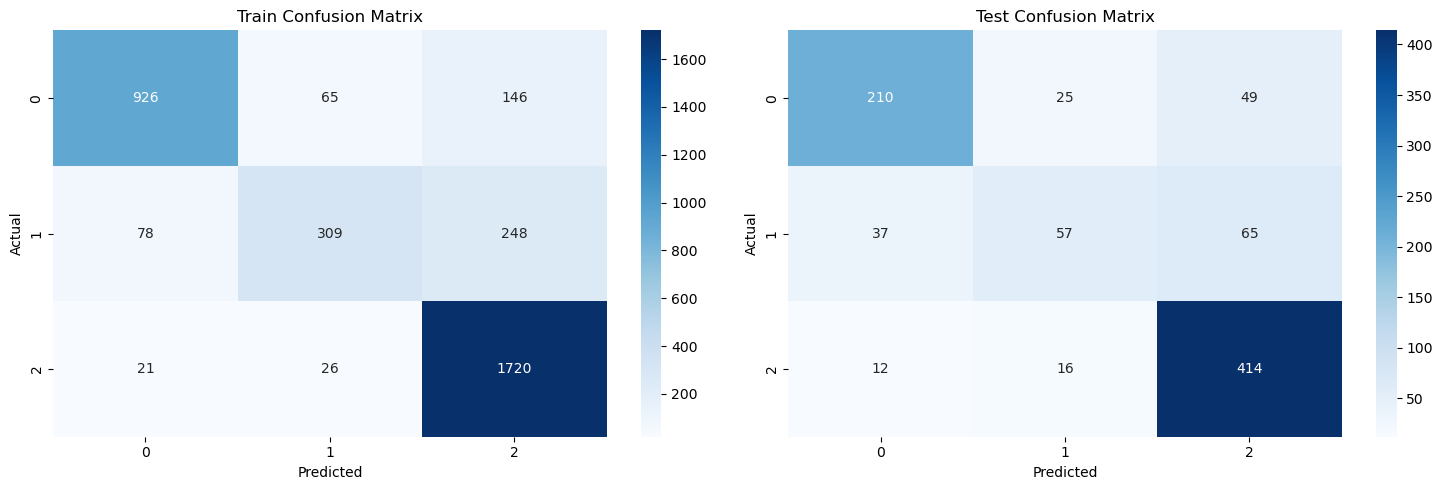

In [168]:
# Predict for train and test
y_train_pred_xgb = random_search_xgb.predict(X_train)
y_test_pred_xgb  = random_search_xgb.predict(X_test)

# Compute confusion matrices
cm_train_xgb = confusion_matrix(y_train_encoded, y_train_pred_xgb)
cm_test_xgb  = confusion_matrix(y_test_encoded, y_test_pred_xgb)  

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Of all the models tried, XG Boost Classifier performed better.

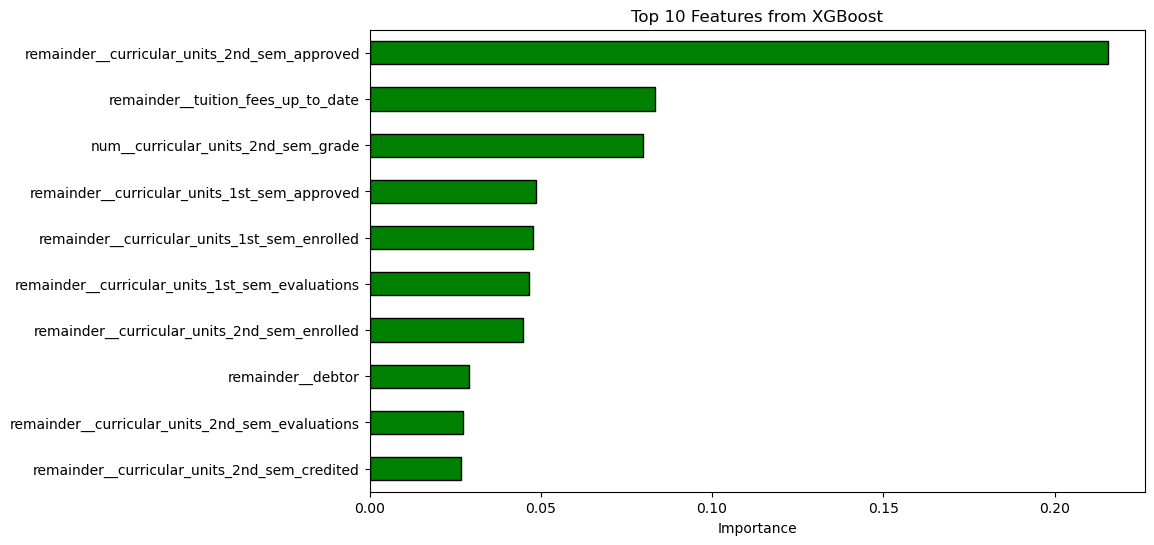

In [169]:
# Get feature importances from best estimator
xgb_model = random_search_xgb.best_estimator_.named_steps['classifier']
feature_names = random_search_xgb.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
importances = pd.Series(xgb_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

N = 10

plt.figure(figsize=(10, 6))
importances.head(N).plot(kind='barh', color='green', edgecolor='black')
plt.xlabel('Importance')
plt.title(f'Top {N} Features from XGBoost')
plt.gca().invert_yaxis()  # Most important at top
plt.show()

In [179]:
# Checking for a sample datapoint which gives the dropout probability of a particular student
row = data.drop('target', axis=1).sample(1)
display(row)
print('')
proba = random_search_xgb.predict_proba(row)
print(f"Dropout probability of this student: {proba[0][0]:.4f}")  # column 0 = Dropout

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nationality,mothers_qualification,fathers_qualification,...,curricular_units_1st_sem_without_evaluations,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp
2021,1,39,1,9853,1,1,140.0,1,19,1,...,0,0,6,0,0,0.0,0,12.7,3.7,-1.7



Dropout probability of this student: 0.9426
